In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sc
from ydata_profiling import ProfileReport
from scipy import stats as sts
import sklearn 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression, ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, f1_score, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error, explained_variance_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer, KNNImputer
sklearn.impute.KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
import phik
from typing import Literal
from lightgbm import LGBMRegressor
import umap
import optuna
from sklearn.pipeline import Pipeline
import mlflow
import mlflow.sklearn  # Если нужно логировать модели sklearn
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("price_prediction_experiment")  # Создаём новый эксперимент
import os
from mlflow.models import infer_signature


%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [39]:
df = pd.read_csv('data/portugal_listinigs.csv')

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_11987/499035845.py:1: DtypeWarning: Columns (6,8,12,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/portugal_listinigs.csv')


In [40]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [41]:
df.isna().sum()

Price                       300
District                      0
City                          0
Town                          2
Type                         16
EnergyCertificate            14
Floor                    107607
Parking                     194
HasParking                67321
ConstructionYear          47515
TotalArea                  8383
GrossArea                107898
EnergyEfficiencyLevel     68247
PublishDate              106297
Garage                    68247
Elevator                     32
ElectricCarsCharging      68247
TotalRooms                62292
NumberOfBedrooms          88495
NumberOfWC                78280
ConservationStatus       116244
LivingArea                30584
LotSize                   95953
BuiltArea                108919
NumberOfBathrooms          6836
dtype: int64

In [42]:
df = df.dropna(subset='Price')

In [43]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


<Axes: >

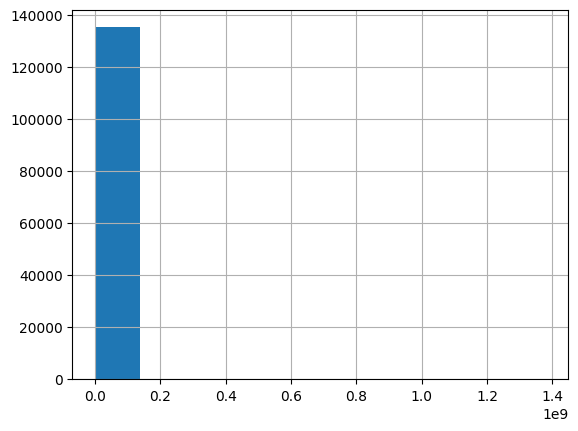

In [44]:
df['Price'].hist()

In [45]:
# profile = ProfileReport(df, minimal=True)
# profile.to_file('real_estate_report.html')

In [46]:
print(df.info(memory_usage="deep"))
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")


<class 'pandas.core.frame.DataFrame'>
Index: 135236 entries, 0 to 135535
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Price                  135236 non-null  float64
 1   District               135236 non-null  object 
 2   City                   135236 non-null  object 
 3   Town                   135234 non-null  object 
 4   Type                   135220 non-null  object 
 5   EnergyCertificate      135222 non-null  object 
 6   Floor                  27846 non-null   object 
 7   Parking                135042 non-null  float64
 8   HasParking             68075 non-null   object 
 9   ConstructionYear       87866 non-null   float64
 10  TotalArea              126859 non-null  float64
 11  GrossArea              27617 non-null   float64
 12  EnergyEfficiencyLevel  67129 non-null   object 
 13  PublishDate            29226 non-null   object 
 14  Garage                 67129 non-null   o

In [48]:
df_num = df.select_dtypes(include='number')

In [49]:
df = df[df['Price'] != df['Price'].max()]
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [50]:
for col in df_num.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df_num[col].median()
    df[col] = np.where((df[col] > upper_bound) | (df[col] < lower_bound), median, df[col])

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_11987/3488598229.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where((df[col] > upper_bound) | (df[col] < lower_bound), median, df[col])
/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_11987/3488598229.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where((df[col] > upper_bound) | (df[col] < lower_bound), median, df[col])
/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_11987/3488598229.py:9: 

<Axes: >

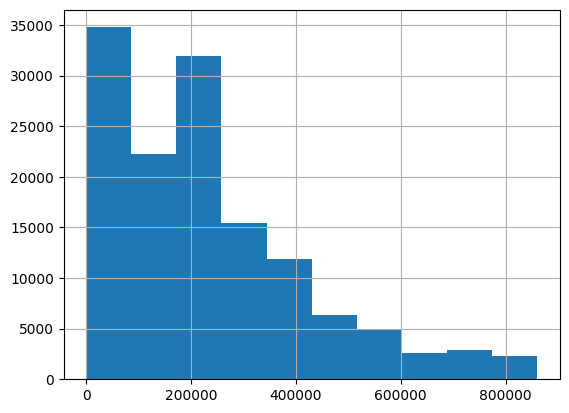

In [51]:
df['Price'].hist()

In [52]:
from geopy.geocoders import Nominatim
from tqdm import tqdm

In [55]:
geolocator = Nominatim(user_agent="city_to_coords")

def get_coordinates(city_list):
    results = []
    for city in tqdm(city_list, desc="Обработка городов"):
        try:
            location = geolocator.geocode(city)
            if location:
                results.append((city, location.latitude, location.longitude))
            else:
                results.append((city, None, None))
        except Exception as e:
            print(f"Ошибка при обработке {city}: {e}")
            results.append((city, None, None))
    return results


coords = get_coordinates(df['City'].unique())
coords


Обработка городов:  31%|███       | 85/275 [02:24<07:36,  2.40s/it]

Ошибка при обработке Mora: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Mora&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Обработка городов: 100%|██████████| 275/275 [07:50<00:00,  1.71s/it]


[('São Brás de Alportel', 37.1529622, -7.8879138),
 ('Albufeira', 37.088241, -8.2526339),
 ('Vila do Bispo', 37.0829799, -8.9096115),
 ('Portimão', 37.1375808, -8.5368426),
 ('Faro', 37.0162727, -7.9351771),
 ('Loulé', 37.1395485, -8.0232598),
 ('Lagos', 6.4550575, 3.3941795),
 ('Peniche', 39.3568749, -9.3786838),
 ('Alcoutim', 37.402329300000005, -7.669049938495098),
 ('Valpaços', 41.6067883, -7.3108525),
 ('Lagoa (Algarve)', 37.16173885, -8.50351695),
 ('Castro Marim', 37.2179367, -7.4457102),
 ('Olhão', 37.0270369, -7.8411287),
 ('Vila Real de Santo António', 37.1946052, -7.4155628),
 ('Silves', 37.26398255, -8.348731138182709),
 ('Tavira', 37.1262493, -7.6499121),
 ('Aljezur', 37.3151549, -8.8040533),
 ('Porto', 41.1494512, -8.6107884),
 ('Monchique', 37.3179725, -8.5558655),
 ('Sintra', 38.79846, -9.3881),
 ('Seia', 40.4200998, -7.7028054),
 ('Paços de Ferreira', 41.290118, -8.378194008811969),
 ('Almeida', 40.7263333, -6.9067513),
 ('Gouveia', -18.4545728, -43.7415904),
 ('Celori

In [56]:
l = []
la = []
c = []
for i in coords: 
    la.append(i[1])
    l.append(i[2])


In [57]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,False,False,NaN,3.0,1.0,NaN,190.0,680.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [58]:
df['lactitude'] = df['City'].map(dict(zip(df['City'].unique(), la)))
df['longitude'] = df['City'].map(dict(zip(df['City'].unique(), l)))

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_11987/2819840563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lactitude'] = df['City'].map(dict(zip(df['City'].unique(), la)))
/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_11987/2819840563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude'] = df['City'].map(dict(zip(df['City'].unique(), l)))


In [59]:
df['PublishDate']

0                         NaN
1                         NaN
2                         NaN
3                         NaN
4                         NaN
                 ...         
135531                    NaN
135532                    NaN
135533                    NaN
135534    2022-07-07 16:06:50
135535    2023-01-05 15:37:09
Name: PublishDate, Length: 135235, dtype: object

In [60]:
import re

pattern = r"\d{4}-\d{2}-\d{2}"

for i in df.dropna().index:
    re.findall(pattern, df['PublishDate'][i])

In [61]:
df['ExtractedDate'] = df['PublishDate'].dropna().apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_11987/1427836694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExtractedDate'] = df['PublishDate'].dropna().apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)


In [62]:
df['ExtractedDate']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
135531           NaN
135532           NaN
135533           NaN
135534    2022-07-07
135535    2023-01-05
Name: ExtractedDate, Length: 135235, dtype: object

In [63]:
df['ExtractedDate'].unique()

array([nan, '2024-10-21', '2024-10-18', '2024-10-17', '2024-10-16',
       '2024-10-15', '2024-10-14', '2024-10-11', '2024-10-10',
       '2024-10-12', '2024-10-09', '2024-10-08', '2024-10-07',
       '2024-10-04', '2024-10-03', '2024-10-02', '2024-10-01',
       '2024-10-06', '2024-09-30', '2024-09-26', '2024-09-20',
       '2024-09-19', '2024-09-18', '2024-09-27', '2024-09-16',
       '2024-09-13', '2024-09-17', '2024-09-12', '2024-09-11',
       '2024-09-10', '2024-09-09', '2024-09-06', '2024-09-05',
       '2024-09-04', '2024-09-03', '2024-09-02', '2024-08-31',
       '2024-08-30', '2024-08-29', '2024-08-28', '2024-08-27',
       '2024-08-26', '2024-08-23', '2024-08-22', '2024-08-21',
       '2024-08-16', '2024-08-19', '2024-08-14', '2024-08-13',
       '2024-08-20', '2024-08-12', '2024-08-09', '2024-08-07',
       '2024-08-08', '2024-08-06', '2024-08-05', '2024-08-02',
       '2024-08-01', '2024-07-31', '2024-07-30', '2024-07-29',
       '2024-07-26', '2024-07-25', '2024-07-24', '

In [64]:
df['ExtractedDate'] = pd.to_datetime(df['ExtractedDate'])

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_11987/4084587608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExtractedDate'] = pd.to_datetime(df['ExtractedDate'])


In [66]:
df['ExtractedDate'] = df['ExtractedDate'].fillna(df['ExtractedDate'].mode()[0])

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_11987/4092470233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExtractedDate'] = df['ExtractedDate'].fillna(df['ExtractedDate'].mode()[0])


In [67]:
df = df.drop(columns=['PublishDate'])

interval columns not set, guessing: ['Price', 'Parking', 'ConstructionYear', 'TotalArea', 'GrossArea', 'TotalRooms', 'NumberOfBedrooms', 'NumberOfWC', 'LivingArea', 'LotSize', 'BuiltArea', 'NumberOfBathrooms', 'lactitude', 'longitude']


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Town is large: 2263. Are you sure this is not an interval variable? Analysis for pairs of variables including Town can be slow.
  warnings.warn(


<Axes: >

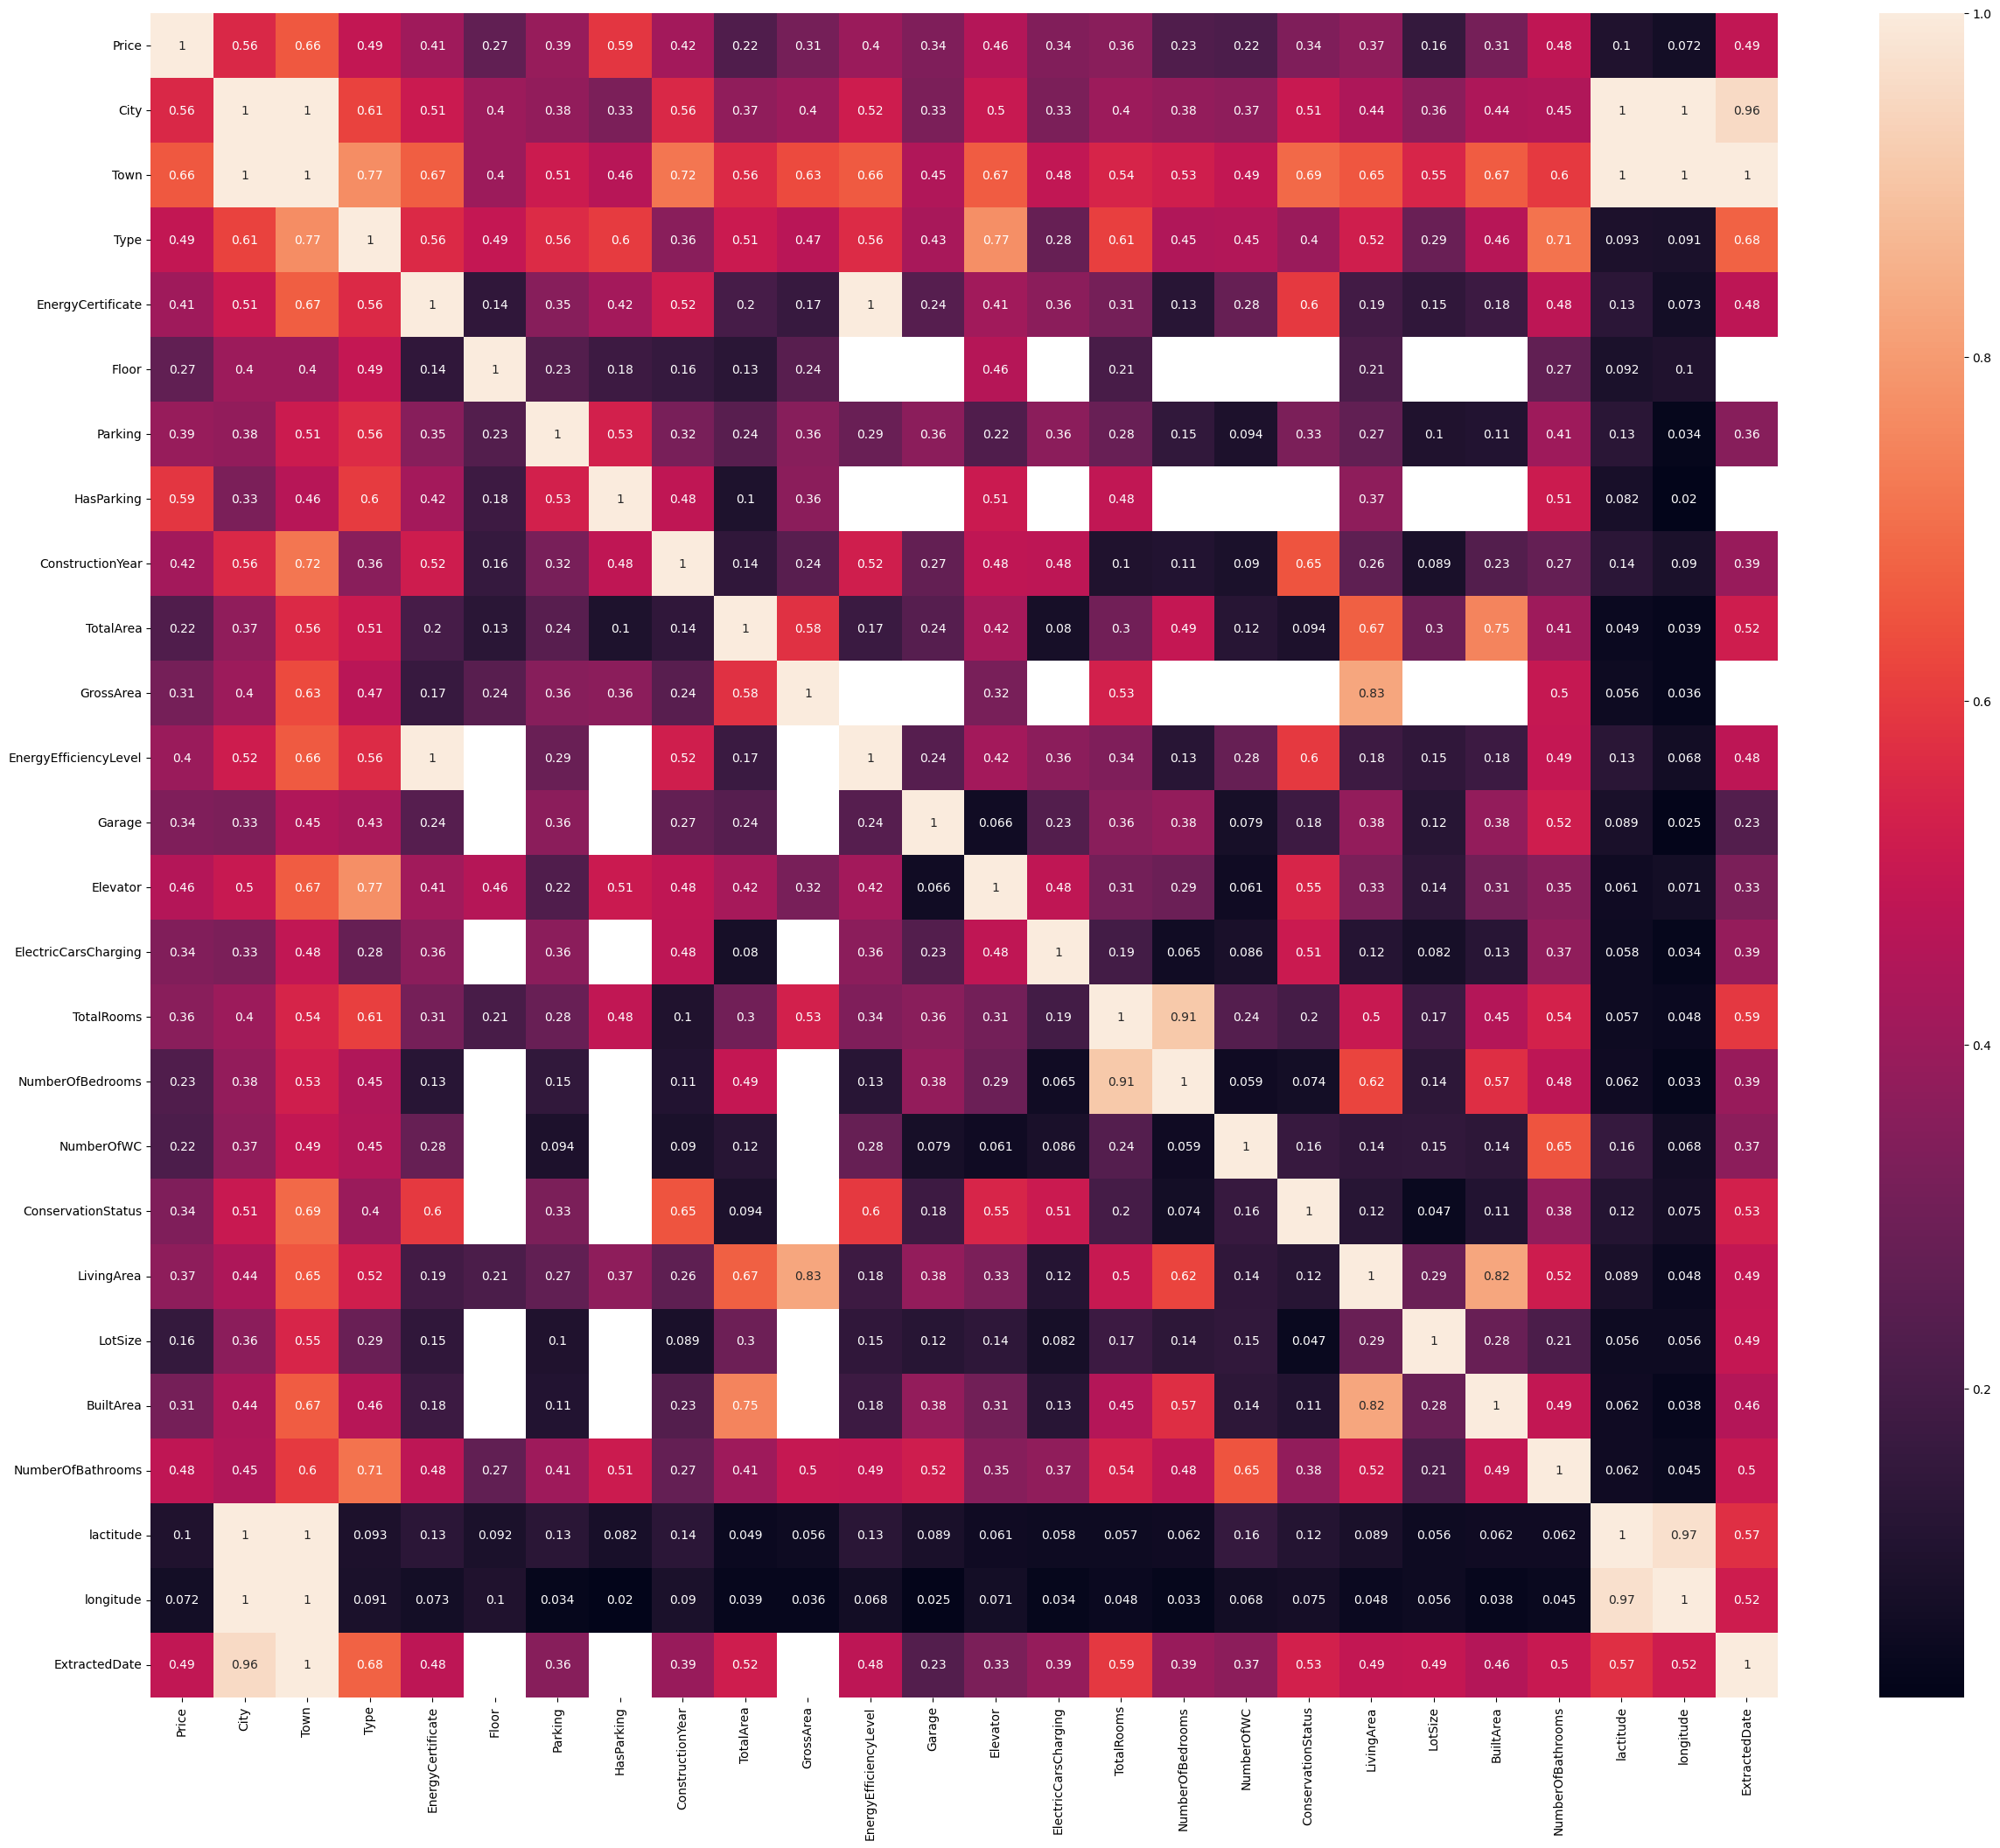

In [31]:
plt.figure(figsize=(30, 25))
sns.heatmap(df.drop(columns='District').phik_matrix(), annot=True)

In [68]:
df['Days_since_start'] = (df['ExtractedDate'] - df['ExtractedDate'].min()).dt.days
df = df.drop(columns='ExtractedDate')
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude,Days_since_start
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,NaN,NaN,NaN,114.0,NaN,NaN,2.0,37.152962,-7.887914,5424
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,NaN,NaN,NaN,27.0,NaN,NaN,1.0,37.088241,-8.252634,5424
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,NaN,NaN,NaN,84.0,NaN,NaN,2.0,37.082980,-8.909612,5424
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,NaN,NaN,NaN,68.0,NaN,NaN,1.0,37.137581,-8.536843,5424
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,NaN,NaN,NaN,78.0,NaN,NaN,2.0,37.016273,-7.935177,5424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,...,3.0,1.0,NaN,190.0,680.0,238.00,3.0,41.606788,-7.310853,5424
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,...,1.0,NaN,New,39.0,NaN,60.00,1.0,41.823221,-7.792314,5424
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,...,2.0,1.0,NaN,84.0,NaN,84.50,2.0,41.276862,-7.475379,5424
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,300.0,240.88,0.0,41.266385,-7.575761,4508


In [69]:
df.columns

Index(['Price', 'District', 'City', 'Town', 'Type', 'EnergyCertificate',
       'Floor', 'Parking', 'HasParking', 'ConstructionYear', 'TotalArea',
       'GrossArea', 'EnergyEfficiencyLevel', 'Garage', 'Elevator',
       'ElectricCarsCharging', 'TotalRooms', 'NumberOfBedrooms', 'NumberOfWC',
       'ConservationStatus', 'LivingArea', 'LotSize', 'BuiltArea',
       'NumberOfBathrooms', 'lactitude', 'longitude', 'Days_since_start'],
      dtype='object')

In [70]:
df['EnergyCertificate'].unique()

array(['A+', 'NC', 'D', 'C', 'A', 'B-', 'E', 'B', 'F', 'G',
       'Not available', nan, 'No Certificate'], dtype=object)

In [71]:
def encode(x):
    if x == 'A+':
        return 7.5
    elif x == 'A':
        return 7
    elif x == 'B':
        return 6
    elif x == 'B-':
        return 5.5
    elif x == 'C':
        return 4
    elif x == 'D':
        return 3
    elif x == 'E':
        return 2
    elif x == 'F':
        return 1
    elif x == 'G':
        return 0
    else:
        return None
    

In [72]:
df[['EnergyCertificate', 'EnergyEfficiencyLevel']] = df[['EnergyCertificate', 'EnergyEfficiencyLevel']].map(lambda x: encode(x))

In [73]:
si = SimpleImputer(strategy='most_frequent')
df[['EnergyCertificate', 'EnergyEfficiencyLevel']] = SimpleImputer(strategy='most_frequent').fit_transform(df[['EnergyCertificate', 'EnergyEfficiencyLevel']])

In [74]:
df['EnergyEfficiencyLevel'].unique()

array([4. , 1. , 3. , 6. , 2. , 5.5, 7. , 7.5, 0. ])

In [ ]:
df = df.drop(columns='City')

In [128]:
def price_encode(columns):
    df1 = df.copy()
    
    for col in columns:
        features_order = list(df1.groupby(col)['Price'].mean().sort_values().index)
        oe = OrdinalEncoder(categories=[features_order], handle_unknown='use_encoded_value', unknown_value=-1)
        df1[[col]] = oe.fit_transform(df1[[col]])

    return df1

# Запускаем
df_encoded = price_encode(['District', 'Town', 'Type'])


In [131]:
df1 = df_encoded.iloc[:50000]

In [132]:
df1

,Price,District,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,...,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude,Days_since_start
0,250000.0,22.0,1830.0,16.0,7.5,2nd Floor,1.0,True,NaN,114.0,...,NaN,NaN,NaN,114.0,NaN,NaN,2.0,37.152962,-7.887914,5424
1,9500.0,22.0,1072.0,16.0,4.0,1st Floor,0.0,False,1990.0,27.0,...,NaN,NaN,NaN,27.0,NaN,NaN,1.0,37.088241,-8.252634,5424
2,580000.0,22.0,1788.0,16.0,3.0,3rd Floor,1.0,True,2003.0,84.0,...,NaN,NaN,NaN,84.0,NaN,NaN,2.0,37.082980,-8.909612,5424
3,350000.0,22.0,2058.0,16.0,4.0,4th Floor,0.0,False,1985.0,68.0,...,NaN,NaN,NaN,68.0,NaN,NaN,1.0,37.137581,-8.536843,5424
4,175000.0,22.0,2189.0,14.0,4.0,NaN,0.0,False,1950.0,78.0,...,NaN,NaN,NaN,78.0,NaN,NaN,2.0,37.016273,-7.935177,5424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50112,640000.0,21.0,2227.0,16.0,4.0,3rd Floor,2.0,True,NaN,104.0,...,NaN,NaN,NaN,104.0,NaN,NaN,2.0,41.130010,-8.605842,5424
50113,800000.0,21.0,2173.0,14.0,7.0,NaN,2.0,True,2023.0,223.0,...,NaN,NaN,NaN,222.0,NaN,NaN,2.0,41.180681,-8.682200,5424
50114,285000.0,21.0,2227.0,16.0,4.0,2nd Floor,1.0,True,NaN,56.0,...,NaN,NaN,NaN,56.0,NaN,NaN,1.0,41.130010,-8.605842,5424
50115,325000.0,16.0,2166.0,16.0,6.0,Ground Floor,2.0,True,2014.0,130.0,...,NaN,NaN,NaN,83.0,NaN,NaN,2.0,40.640496,-8.653784,5424


In [134]:
X = df1.drop(columns='Price')
y = df1['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [135]:
num_cols = X_train.select_dtypes(include='number').columns
binary = X_train.nunique()[df.nunique() == 2].index
cat_cols = X_train.drop(columns=['Floor']).select_dtypes(include='object').columns

In [136]:
df_encoded

,Price,District,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,...,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude,Days_since_start
0,250000.0,22.0,1830.0,16.0,7.5,2nd Floor,1.0,True,NaN,114.0,...,NaN,NaN,NaN,114.0,NaN,NaN,2.0,37.152962,-7.887914,5424
1,9500.0,22.0,1072.0,16.0,4.0,1st Floor,0.0,False,1990.0,27.0,...,NaN,NaN,NaN,27.0,NaN,NaN,1.0,37.088241,-8.252634,5424
2,580000.0,22.0,1788.0,16.0,3.0,3rd Floor,1.0,True,2003.0,84.0,...,NaN,NaN,NaN,84.0,NaN,NaN,2.0,37.082980,-8.909612,5424
3,350000.0,22.0,2058.0,16.0,4.0,4th Floor,0.0,False,1985.0,68.0,...,NaN,NaN,NaN,68.0,NaN,NaN,1.0,37.137581,-8.536843,5424
4,175000.0,22.0,2189.0,14.0,4.0,NaN,0.0,False,1950.0,78.0,...,NaN,NaN,NaN,78.0,NaN,NaN,2.0,37.016273,-7.935177,5424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,7.0,1757.0,14.0,1.0,NaN,1.0,NaN,1982.0,188.0,...,3.0,1.0,NaN,190.0,680.0,238.00,3.0,41.606788,-7.310853,5424
135532,77500.0,7.0,1165.0,16.0,4.0,NaN,0.0,NaN,2010.0,39.0,...,1.0,NaN,New,39.0,NaN,60.00,1.0,41.823221,-7.792314,5424
135533,50000.0,7.0,1586.0,14.0,4.0,NaN,1.0,NaN,1987.0,69.0,...,2.0,1.0,NaN,84.0,NaN,84.50,2.0,41.276862,-7.475379,5424
135534,36000.0,7.0,899.0,4.0,4.0,NaN,0.0,NaN,NaN,90.0,...,NaN,0.0,NaN,NaN,300.0,240.88,0.0,41.266385,-7.575761,4508


In [137]:
class BinaryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.feature_idx_ = None

    def fit(self, X, y=None):
        # Сохраняем индексы колонок для numpy array
        if isinstance(X, np.ndarray):
            self.feature_idx_ = np.arange(X.shape[1])
        return self

    def transform(self, X):
        # Преобразуем входные данные в numpy array если это еще не сделано
        X_arr = np.array(X_train) if not isinstance(X, np.ndarray) else X.copy()
        # Преобразуем все значения в int
        return X_arr.astype(int)
    
    
# class PriceRelatedOrdinalEncoder(BaseEstimator, TransformerMixin):
#     def __init__(self, cols_to_encode):
#         self.cols_to_encode = cols_to_encode
#         self.order = {}
#         self.enoder = None            
    
#     def fit(self, X, y=None):
#         for col in self.cols_to_encode:
#             self.order[col] =  list(X.groupby(col)['Price'].agg('mean').sort_values(ascending=True).index)
        
#         self.encoder = OrdinalEncoder(categories=list(self.order.values()), handle_unknown='use_encoded_value', unknown_value=-1)
#         self.encoder.fit(X[list(self.order.keys())])
        
#         return self
    
#     def transform(self, X):
#         X_transformed = X.copy()
#         X_transformed[self.order.keys()] = self.encoder.transform(X[self.order.keys()])
        
#         return X_transformed

class PriceRelatedOrdinalEncoder:
    def __init__(self, cols_to_encode):
        self.cols_to_encode = cols_to_encode
        self.order = {}
        self.encoder = None
        
    def fit(self, X, y=None):
        # Преобразуем numpy массив в DataFrame
        X_df = pd.DataFrame(X, columns=self.cols_to_encode)
        X_df['Price'] = y  # Добавляем столбец с ценами
        
        for col in self.cols_to_encode:
            self.order[col] = list(X_df.groupby(col)['Price'].agg('mean').sort_values(ascending=True).index)
        
        self.encoder = OrdinalEncoder(categories=list(self.order.values()), 
                                    handle_unknown='use_encoded_value', 
                                    unknown_value=-1)
        self.encoder.fit(X_df[self.cols_to_encode])
        return self
        
    def transform(self, X):
        # Преобразуем входные данные в DataFrame если это numpy массив
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.cols_to_encode)
            
        return self.encoder.transform(X[self.cols_to_encode])
            
            

In [142]:
all_models_errors = []

In [145]:
def create_pipeline(trial):
    num_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('scaler', PowerTransformer())
    ])
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder())
    ])
    binary_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', BinaryEncoder(columns=binary)),
        ('scaler', PowerTransformer())
    ])
    price_related = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', PriceRelatedOrdinalEncoder(cols_to_encode=['Type', 'Floor', 'District'])),
        ('scaler', PowerTransformer())
    ])
    
    model = trial.suggest_categorical('model', ['lgbm', 'xgb'])
    
    if model == 'xgb':
        n_estimators = 300
        learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        reg_alpha = trial.suggest_float('reg_alpha', 0.1, 4)
        reg_lambda = trial.suggest_float('reg_lambda', 0.01, 1)
        regressor = XGBRegressor(n_estimators=n_estimators, 
                             learning_rate=learning_rate, 
                             max_depth=max_depth,
                             reg_alpha=reg_alpha,
                             reg_lambda=reg_lambda)
        
    else: 
        n_estimators = 300
        learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        reg_alpha = trial.suggest_float('reg_alpha', 0.1, 4)
        reg_lambda = trial.suggest_float('reg_lambda', 0.01, 1)
        regressor = LGBMRegressor(n_estimators=n_estimators, 
                             learning_rate=learning_rate, 
                             max_depth=max_depth,
                             reg_alpha=reg_alpha,
                             reg_lambda=reg_lambda, 
                             verbosity=0)
    
    pipeline = Pipeline([
        ('transform', ColumnTransformer([
            ('num', num_pipeline, num_cols),
            ('cat', cat_pipeline, cat_cols),
            ('binary', binary_pipeline, binary),
            ('price_related', price_related, ['Type', 'Floor', 'District'])
        ])),
        ('model', regressor)
    ])
    return pipeline
    
def objective(trial):
    pipeline_opt = create_pipeline(trial)
    
    with mlflow.start_run():  # Начинаем логирование нового прогона
        mlflow.log_params(trial.params)  # Логируем гиперпараметры
        
        pipeline_opt.fit(X_train, y_train)
        predictions = pipeline_opt.predict(X_test)
        
        metric = mean_absolute_error(y_test, predictions)  # Метрика
        
        abs_errors = np.abs(y_test - predictions)
        med_abs = np.median(abs_errors)
        mean_abs = np.mean(abs_errors)
        distance = np.abs(med_abs - mean_abs)
        
        mlflow.log_metric("MAE", metric)
        mlflow.log_metric("Median Absolute Error", med_abs)
        mlflow.log_metric("Mean Absolute Error", mean_abs)
        mlflow.log_metric("Mean-Median Distance", distance)
        
        # 🔹 Создаём папку для артефактов, если её нет
        os.makedirs("mlflow_artifacts", exist_ok=True)
        
        # Логируем график распределения ошибок
        plt.figure()
        sns.histplot(abs_errors, bins=50)
        plt.title('Absolute Errors')
        plt.axvline(med_abs, color='red', label='Median')
        plt.axvline(mean_abs, color='green', label='Mean')
        plt.legend([f'Median: {med_abs:.2f}', f'Mean: {mean_abs:.2f}', f'Δ = {distance:.2f}'])
        plt.savefig("error_distribution.png")  # Сохраняем график
        mlflow.log_artifact("error_distribution.png")  # Логируем в MLflow
        
        plt.close()  # Закрываем график, чтобы не перегружать память
        
        # Логируем модель
        example_input = X_test[:5]
        signature = infer_signature(X_test, pipeline_opt.predict(X_test))
        mlflow.sklearn.log_model(pipeline_opt, "model_pipeline", signature=signature, input_example=example_input)

    return metric


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Лучшие параметры:", study.best_params) 
print("Лучшая точность:", study.best_value) 

# Итоговый пайплайн с лучшими параметрами
best_trial = study.best_trial
final_pipeline = create_pipeline(best_trial)
final_pipeline.fit(X_train, y_train)


[I 2025-03-02 01:22:48,812] A new study created in memory with name: no-name-747dbd50-70ff-46ba-bce5-16beb2d7c70d
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus'

🏃 View run bittersweet-cub-710 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/01c2ecd4556b40c79f0ffae2a5a157f7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run magnificent-fowl-566 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/231f9000fc4141e09c9e3d7bdea92cef
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run upbeat-bear-829 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/fa0c73e53f65455f8dacc3c43fe32aeb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run gaudy-ape-948 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/9079ce515e4f4c20b80b2e52ee8acd1e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run youthful-owl-684 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/cf1dfbaf25aa4557952dfaf13a9fe885
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus'

🏃 View run sedate-shad-957 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/d48ccad8d5ca47999f5bd9d075a95ce4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run valuable-lark-850 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/2041c66bd1bc4a20bfbec0214acbba2a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run lyrical-mule-596 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/da87e4e128b54d35ba99e0df0c00e133
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run respected-quail-731 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/2c3ced70d97549528ba783443149f21d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus'

🏃 View run defiant-snail-575 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/4d875a1f81b44ee5903959ea18384c48
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run awesome-rook-167 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/b4decec55c20424f85c488e6024541a9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run exultant-hound-874 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/c16c034cfbb54189a9f0a2b20b550e9e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus'

🏃 View run nebulous-tern-305 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/3347d88ce7bf4da2bc017030ce02a715
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus'

🏃 View run aged-sheep-357 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/1443e063d1ef4b95bbb55173211f84e0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run overjoyed-perch-332 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/33f7cb0489304493aa1bd442a1316623
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus'

🏃 View run sedate-moth-426 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/106fe6a13b414924a0b160c5332932b5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run overjoyed-stag-834 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/eed336e034de4d66aa59c1690d549e43
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus'

🏃 View run grandiose-moth-250 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/3548370f101346ee899b8c4138d63d47
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run treasured-bird-904 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/8aaf4a99b4bc408f9f84f27e8b104a47
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus'

🏃 View run spiffy-skink-236 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/dac9fb846d01494e88f3b2a8af62bc3d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run mysterious-shad-982 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/a68b934a9691450896de383f79bf37ca
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run delightful-robin-877 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/99aad612d5b6427780a81deab7849f9a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run industrious-colt-496 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/b71ba4dd8d9643058d425fd0f75cc7bc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus'

🏃 View run thoughtful-trout-237 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/cf797d4724ef4279b97b730f89ac5f65
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run kindly-hen-818 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/99fec24430154f82a3d3ed63104694ac
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run invincible-auk-787 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/2e59153be3974a3cb259be959555d88d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run useful-fawn-208 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/87ad699a3b544a7fbc107517b0554820
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run adventurous-newt-948 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/237f29c4b1f04137abaaae5b3cb96e8d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus'

🏃 View run flawless-gnu-255 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/712b0b1bc8fc4e41ae0ed2b1caa5728a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run traveling-shad-80 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/4217d194b6a743688d5da13e38621653
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run grandiose-trout-841 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/c0d34f8054e44fb3a54994eadfd16b3c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run rebellious-stag-633 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/110ffa87c6e84b5891d6709771c842eb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run gregarious-snake-343 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/b5b66506b2b5412eb7b5e7ac0b463310
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run sassy-seal-673 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/ed2b38f163034dc196c9a384ca4e3444
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus'

🏃 View run peaceful-penguin-150 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/1dd074dec5c64dbfaca69acc0ef648df
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run bemused-fowl-573 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/9c46ea082dc347798024e14b36ab62b6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run enchanting-worm-662 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/d83d202e4ff946cba6137c12b85b62ef
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run legendary-fowl-619 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/2b648ae9dd8a4d5a9f8c0570a77b15c1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run bright-dove-222 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/d8c5d5e3280b4b4a8db1e71eadfc56b9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run bouncy-mouse-171 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/2293284db2bd44c7b820ec7d0cbda910
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run whimsical-bat-84 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/39d7caf287fb425ba9dc19ee91e0fae5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run incongruous-bear-615 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/d3d9743357934345b7e6def192a0a7af
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run valuable-eel-50 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/e4bf5d88857d4ddd97da48690a1caf04
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run unruly-gnat-823 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/47be37039fac4670aa182a061b3c75b2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run blushing-robin-676 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/0293e1a55e904fc380c608324797f1ce
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run capable-ox-968 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/c4adc87e82c14c1ca7ea553ce4030795
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run burly-kit-78 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/ac1b809c6de643d9b16365d056ff0e1a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run loud-dog-875 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/709be1acbd9c422085b5155cca61108b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run caring-steed-479 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/af89e0eb84ed41a090a8fe067c1fdb1d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: 

🏃 View run unruly-bee-128 at: http://127.0.0.1:5000/#/experiments/858879284820113245/runs/6d0d09462f84483e97f902ecbe2535a4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/858879284820113245
Лучшие параметры: {'model': 'xgb', 'learning_rate': 0.18054540129360142, 'max_depth': 8, 'reg_alpha': 3.408939231482339, 'reg_lambda': 0.7612815090613726}
Лучшая точность: 71818.8835203599


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging' 'ConservationStatus']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Garage' 'ElectricCarsCharging']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['District', 'Town', 'Type', 'EnergyCertificate', 'Parking',
       'ConstructionYear', 'TotalArea', 'GrossArea', 'EnergyEfficiencyLevel',
       'TotalRooms', 'NumberOfBedrooms', 'NumberOfWC', 'LivingArea', 'LotSize',
       'BuiltArea',...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.18054540129360142, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
best_trial = study.best_trial
final_pipeline = create_pipeline(best_trial)
final_pipeline.fit(X_train, y_train)

with mlflow.start_run():
    mlflow.log_params(best_trial.params)
    mlflow.sklearn.log_model(final_pipeline, "final_model_pipeline")


In [166]:
study.best_params, study.best_value

({'model': 'xgb',
  'learning_rate': 0.06747048754087821,
  'max_depth': 10,
  'reg_alpha': 2.7428029417005613,
  'reg_lambda': 0.9457813633431938},
 75235.06263193868)

In [100]:
X_train

,District,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,...,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude
926,Faro,Store,D,NaN,0.0,False,2003.0,768.0,164.0,NaN,...,NaN,NaN,NaN,NaN,118.0,NaN,NaN,NaN,37.139548,-8.023260
2968,Faro,House,A,NaN,0.0,False,2022.0,91.0,91.0,NaN,...,1.0,NaN,NaN,NaN,91.0,NaN,NaN,2.0,37.161739,-8.503517
490,Faro,Apartment,E,5th Floor,1.0,True,1999.0,86.0,86.0,NaN,...,1.0,NaN,NaN,NaN,60.0,NaN,NaN,1.0,37.139548,-8.023260
2516,Faro,Apartment,A,Duplex,2.0,True,2023.0,175.0,NaN,NaN,...,3.0,NaN,NaN,NaN,136.0,NaN,NaN,4.0,37.139548,-8.023260
2432,Faro,Apartment,A,1st Floor,1.0,True,2022.0,236.0,101.0,NaN,...,2.0,NaN,NaN,NaN,101.0,NaN,NaN,2.0,37.161739,-8.503517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Faro,Apartment,NC,Ground Floor,0.0,True,1990.0,30.0,30.0,NaN,...,0.0,NaN,NaN,NaN,30.0,NaN,NaN,1.0,37.088241,-8.252634
280,Faro,Apartment,A+,6th Floor,1.0,True,2023.0,750.0,106.0,NaN,...,2.0,NaN,NaN,NaN,79.0,NaN,NaN,2.0,37.137581,-8.536843
1205,Faro,Apartment,NC,8th Floor,1.0,True,2000.0,78.0,78.0,NaN,...,1.0,NaN,NaN,NaN,78.0,NaN,NaN,1.0,37.139548,-8.023260
1923,Guarda,House,F,NaN,0.0,False,1951.0,191.0,310.0,NaN,...,3.0,NaN,NaN,NaN,140.0,NaN,NaN,0.0,40.930394,-7.251758


In [102]:
X_test

,District,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,...,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude,Days_since_start
7607,Lisboa,Águas Livres,Other - Commercial,4.0,Basement,0.0,False,1989.0,80.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,38.758959,-9.236523,5424
46614,Porto,Ermesinde,House,2.0,NaN,0.0,True,1988.0,159.0,164.0,...,NaN,NaN,NaN,118.0,NaN,NaN,1.0,41.190979,-8.498051,5424
8383,Lisboa,Cascais e Estoril,Apartment,3.0,3rd Floor,2.0,True,1993.0,199.0,259.0,...,NaN,NaN,NaN,180.0,NaN,NaN,0.0,38.696892,-9.420450,5424
7445,Lisboa,São Domingos de Rana,House,7.5,NaN,2.0,True,NaN,300.0,NaN,...,NaN,NaN,NaN,170.0,NaN,NaN,3.0,38.696892,-9.420450,5424
3750,Coimbra,"Coimbra (Sé Nova, Santa Cruz, Almedina e São B...",House,3.0,NaN,2.0,True,1937.0,159.0,440.0,...,NaN,NaN,NaN,220.0,NaN,NaN,2.0,40.211193,-8.429463,5424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41892,Porto,"Cedofeita, Santo Ildefonso, Sé, Miragaia, São ...",Building,2.0,NaN,0.0,False,1951.0,450.0,NaN,...,NaN,NaN,NaN,118.0,NaN,NaN,5.0,41.149451,-8.610788,5424
24601,Santarém,Alpiarça,Land,4.0,NaN,0.0,False,NaN,432.0,216.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.259935,-8.584514,5424
10057,Guarda,Rio Torto e Lagarinhos,Estate,4.0,NaN,0.0,False,NaN,159.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-18.454573,-43.741590,5424
29314,Setúbal,Charneca de Caparica e Sobreda,Land,4.0,NaN,0.0,False,1979.0,159.0,NaN,...,NaN,NaN,NaN,118.0,NaN,NaN,3.0,38.683130,-9.157630,5424


In [100]:
for i in list(X_test.columns):
    if i not in list(X_train.columns):
        print(i)